### Importing Libraries

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Setting Up Directories

In [3]:
data_dir = '/Users/mayankbhardwaj/Documents/Coding/Python/Deep Learning/CNN/cell_images'

In [4]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [5]:
train_path = data_dir+'/train'

In [6]:
test_path = data_dir+'/test'

In [7]:
os.listdir(train_path)

['.DS_Store', 'parasitized', 'uninfected']

In [10]:
len(os.listdir(train_path+'/parasitized'))

12480

### Visualizing images

In [22]:
os.listdir(train_path+'/parasitized')[34]

'C132P93ThinF_IMG_20151004_152505_cell_149.png'

In [26]:
para_image_sample = train_path+'/parasitized/'+'C132P93ThinF_IMG_20151004_152505_cell_149.png'

In [27]:
from matplotlib.image import imread

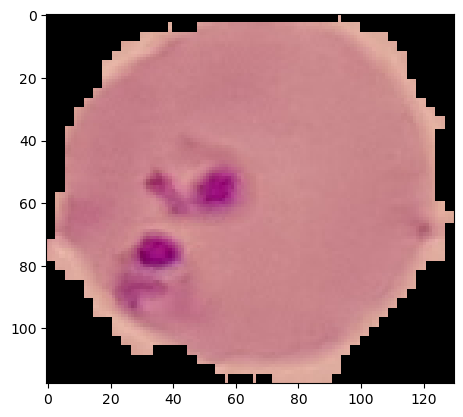

In [28]:
plt.imshow(imread(para_image_sample))

In [29]:
uninf_image_sample = train_path+'/uninfected/'+os.listdir(train_path+'/uninfected')[7]

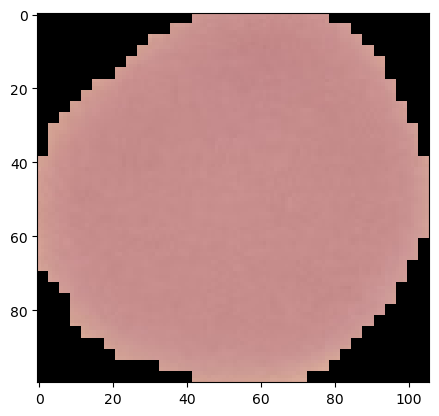

In [30]:
plt.imshow(imread(uninf_image_sample))

### Finding Average size of images

In [34]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/parasitized'):
    if image_filename.endswith('.png') or image_filename.endswith('.jpg'):  # Add this line
        img = imread(train_path+'/parasitized/'+image_filename)
        d1,d2,colour = img.shape
        dim1.append(d1)
        dim2.append(d2)


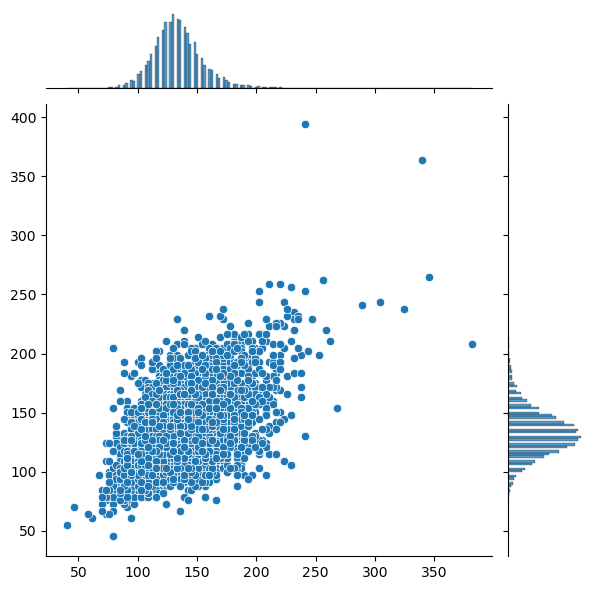

In [46]:
sns.jointplot(x=dim1,y=dim2)

In [37]:
np.mean(dim1)

134.360205144643

In [38]:
np.mean(dim2)

133.66447632021797

In [39]:
image_shape = (134,134,3)

### Initialize Image Data Generator

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
image_gen = ImageDataGenerator(rotation_range=0.2,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

### Applying this transformation to single image

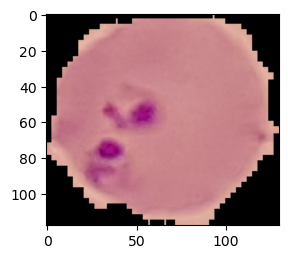

In [43]:
plt.figure(figsize=(3,3))
plt.imshow(imread(para_image_sample))

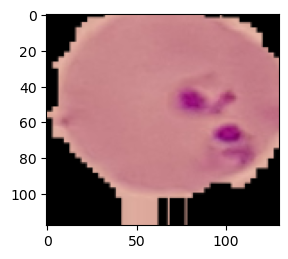

In [48]:
plt.figure(figsize=(3,3))
plt.imshow(image_gen.random_transform(imread(para_image_sample)))

### Creating the Model/Network

In [49]:
from tensorflow.keras.models import Sequential

In [50]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [51]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
batch_size = 16

#### Preparing image data generator

In [83]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                batch_size=batch_size,
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [84]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                batch_size=batch_size,
                                                target_size=image_shape[:2],
                                               color_mode='rgb',
                                                class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


#### Fitting the data

In [85]:
model.fit(train_image_gen, epochs=20,validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
   2/1560 [..............................] - ETA: 1:48 - loss: 0.3004 - accuracy: 0.8438

2023-09-22 23:30:06.957704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9488

2023-09-22 23:31:56.864263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - 116s 74ms/step - loss: 0.1665 - accuracy: 0.9488 - val_loss: 0.1635 - val_accuracy: 0.9435
Epoch 2/20
1560/1560 [==============================] - 149s 95ms/step - loss: 0.1625 - accuracy: 0.9491 - val_loss: 0.1574 - val_accuracy: 0.9442
Epoch 3/20
1560/1560 [==============================] - 181s 116ms/step - loss: 0.1620 - accuracy: 0.9494 - val_loss: 0.1715 - val_accuracy: 0.9454
Epoch 4/20
1560/1560 [==============================] - 180s 115ms/step - loss: 0.1676 - accuracy: 0.9468 - val_loss: 0.2634 - val_accuracy: 0.9112


### Evaluating

In [86]:
metrics_df = pd.DataFrame(model.history.history)

<Axes: >

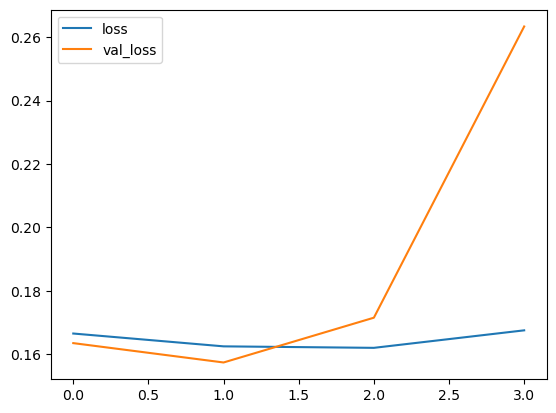

In [88]:
metrics_df[['loss','val_loss']].plot()

In [89]:
loss, accuracy = model.evaluate(test_image_gen)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


  3/163 [..............................] - ETA: 5s - loss: 0.2149 - accuracy: 0.9167 

2023-09-22 23:41:20.709360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 6s 35ms/step - loss: 0.2683 - accuracy: 0.9096
Test loss: 0.2682635486125946, Test accuracy: 0.9096153974533081


In [90]:
from sklearn import metrics

In [91]:
pred = model.predict_generator(test_image_gen)

/var/folders/qy/6lbwh02n7dz0qktxghpcfj0h0000gn/T/ipykernel_36074/2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)
2023-09-22 23:41:37.223154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [92]:
binary_predictions = (pred > 0.5)

In [93]:
binary_predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [94]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(test_image_gen.classes,binary_predictions),
                           index=['parasitized','uninfected'],
                          columns=['parasitized','uninfected'])
conf_matrix

,parasitized,uninfected
parasitized,1085,215
uninfected,21,1279


In [95]:
print(metrics.classification_report(test_image_gen.classes, binary_predictions))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1300
           1       0.86      0.98      0.92      1300

    accuracy                           0.91      2600
   macro avg       0.92      0.91      0.91      2600
weighted avg       0.92      0.91      0.91      2600



### Predicting a Custom image

In [98]:
from tensorflow.keras.preprocessing import image

In [99]:
my_image = image.load_img(para_image_sample, target_size=image_shape)

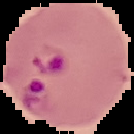

In [100]:
my_image

In [101]:
my_image_arr = image.img_to_array(my_image)

In [103]:
my_image_arr.shape #we want (1,134,134,3)

(134, 134, 3)

In [104]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [105]:
my_image_arr.shape

(1, 134, 134, 3)

In [107]:
my_custom_pred = model.predict(my_image_arr)

1/1 [==============================] - 0s 17ms/step


In [108]:
my_custom_pred_actual = (my_custom_pred>0.5).astype('int32') 
my_custom_pred_actual

array([[0]], dtype=int32)